# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme






```markdown
- un scatterplot : Un scatterplot ou nuage de points en français est une représentation graphique de données souvent nombreuses avec une répartition des données plus ou moins homogènes. Un scatterplot est souvent utilisé pour visualiser la relation entre deux variables numériques (ce qui aide à déceler d’éventuelles corrélations ou tendances).
- un barplot : Il s'agit d'une représentation graphique sous forme de barres rectangulaires, représente la valeur d'une variable en fonction de la hauteur de la barre rectangulaire. Les graphiques à barres incluent la valeur 0 dans la plage d'axes. Un barplot est idéal pour comparer des valeurs associées à des catégories.
- un boxplot : Un boxplot ou diagramme à boite en français est utilisé pour représenter grssièrement le profil s'une série statistique quantitative. C'est un diagramme à utiliser pour déterminer visuellement différents estimateurs : l'écart interquartile, la charnière médiane, l'étendue, l'étendue médianne ou la moyenne. 
- un violinplot : Il s'agit d'une représentation graphique statistique qui permet de comparer des ditributions de probabilité. 
- un histogramme : Il s'agit d'une représentation graphique en statistique qui permet de comparer la répartition empirique d'une variable aléatoire ou d'une série statistique en la représentant avec des colonnes correspondant chacune à une classe et dont l'aire est proportionnelle à l'effectif de la classe.
```

# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

---

Note technique : dans colab, vous pouvez monter votre google drive avec le code suivant :

In [28]:
# TODO uncomment
# from google.colab import drive
# drive.mount('/content/gdrive')

---

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

```markdown
C'est un tableau dont chaque case est séparé par une tabulation dans le ficgier texte "overview.txt"
```

Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

```markdown
Organism/Name  Le nom de l'organisme en fonction du niveau de l'espèce 
Kingdom        Division taxonomique : Archées, Bactéries, Eucaryotes ou Virus 
Group                  Groupes d'organismes couramment utilisés
                       Eucaryotes : animaux, champignons, plantes, protistes ;
                       Procaryotes : groupe correspondant à un embranchement ;
                       Virus : groupes définis comme le premier niveau (non classés)
                       en dessous du règne des virus.

SubGroup       Niveau de taxonomie NCBI sous le groupe :
                       Eucaryotes : mammifères, oiseaux, poissons, vers plats, insectes, 
                       reptiles amphibiens, vers ronds, ascomycètes, basidiomycètes,
                       plantes terrestres, algues vertes, apicomplexes, kinétoplastes ;
                       Procaryotes : les sous-groupes correspondent au niveau de classe ;
                       Virus : les sous-groupes correspondent aux familles, y compris les genres flottants.

Size (Mb)      Taille estimé du génome (Mb = mega base)
Chrs           Nombre de chromosomes 
Organelles     Nombre de organites
Plasmids       Nombre de plasmides 
BioProjects    Nombre de projets de séquençage du génome
```

## Organisation de la base de données

Q4. Combien d’organismes sont présents ?

In [1]:
with open("overview.txt") as file:
    total_lines = sum(1 for line in file)
total_lines -=1 #title

print(f"Nombre d'organismes présents : {total_lines}\n")

Nombre d'organismes présents : 87888



### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
Les êtres vivants qui peuplent notre planète sont classés en grands groupes appelés "royaumes" par les scientifiques. Ces royaumes rassemblent des organismes qui partagent des caractéristiques cellulaires et biochimiques communes. Un royaume est un rang taxonomique de la classification scientifique du monde vivant.
- Le royaume Bactéries : micro-organismes unicellulaires procaryotes, c’est-à-dire dépourvus de noyau ou d’organites intracellulaires délimités par des membranes.
- Le royaume Archées : organismes unicellulaires procaryotes (sans noyau ni organites délimités). Cependant, à la différence des bactéries, les archées possèdent un certain nombre de caractéristiques biochimiques uniques qui les rapprochent plus des eucaryotes.
- Le royaume Eucaryotes : organismes possédant un noyau et des organites intracellulaires.
- Le royaume Virus : ont besoin d'un hôte pour se reproduire, constitué d'un génome et d'une enveloppe protéique.
```

Q6. Combien de royaumes sont présents dans la base ?

```markdown
Il y en a 4 : Archées, Bactéries, Eucaryotes ou Virus.
```

Q7. Affichez le nombre d’organismes pour chaque royaume.

In [2]:
table=open("overview.txt", "r")
d=dict()
words = ["archaea", "bacteria", "eukaryota", "viruses"]
for word in words:
	d[word] = 0

for line in table:
	line = line.strip().lower().split("\t") 
	if line[1] == "archaea":
		d["archaea"] += 1
	elif line[1] == "bacteria":
			d["bacteria"] += 1
	elif line[1] == "eukaryota":
			d["eukaryota"] += 1
	elif line[1] == "viruses":
			d["viruses"] += 1

total = 0
for key in list(d.keys()):
	total += d[key]
	print(f"{key} : {d[key]}")
print(f"total = {total}")

archaea : 2263
bacteria : 37492
eukaryota : 15560
viruses : 32573
total = 87888


### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
Regroupe des espèces partageant des critères spécifiques et un même ancêtre commun.
```

Q9. Combien de groupes sont présents par royaume ?

In [3]:
table = open("overview.txt", "r")

d1 = []
d2 = []
d3 = []
d4 = []
archaea = 0
bacteria = 0
eukaryota = 0
viruses = 0

for line in table:
	line = line.strip().lower().split("\t")
	if line[1] == "kingdom":
		continue
	if line[1] == "archaea":
		if line[2] not in d1:
			d1.append(line[2])
			archaea += 1
	elif line[1] == "bacteria":
		if line[2] not in d2:
			d2.append(line[2])
			bacteria += 1
	elif line[1] == "eukaryota":
		if line[2] not in d3:
			d3.append(line[2])
			eukaryota += 1
	elif line[1] == "viruses":
		if line[2] not in d4:
			d4.append(line[2])
			viruses += 1

print(f"Pour le royaume archaea il y a {archaea} groupes.")
print(f"Pour le royaume bacteria il y a {bacteria} groupes.")
print(f"Pour le royaume eukaryota il y a {eukaryota} groupes.")
print(f"Pour le royaume viruses il y a {viruses} groupes.")

Pour le royaume archaea il y a 11 groupes.
Pour le royaume bacteria il y a 37 groupes.
Pour le royaume eukaryota il y a 5 groupes.
Pour le royaume viruses il y a 8 groupes.


Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

In [4]:
table = open("overview.txt", "r")

d1 = dict()
d2 = dict()
d3 = dict()
d4 = dict()

for line in table:
	line = line.strip().lower().split("\t")
	if line[1] == "kingdom":
		continue

	if line[1] == "archaea":
		if line[2] not in d1:
			d1[line[2]] = 1
		else:
			d1[line[2]] += 1
	elif line[1] == "bacteria":
		if line[2] not in d2:
			d2[line[2]] = 1
		else:
			d2[line[2]] += 1
	elif line[1] == "eukaryota":
		if line[2] not in d3:
			d3[line[2]] = 1
		else:
			d3[line[2]] += 1
	elif line[1] == "viruses":
		if line[2] not in d4:
			d4[line[2]] = 1
		else:
			d4[line[2]] += 1

print("Archaea:")
for group in d1:
  print(f"\t{group} : {d1[group]}")
print("\nBacteria:")
for group in d2:
  print(f"\t{group} : {d2[group]}")
print("\nEukaryota:")
for group in d3:
  print(f"\t{group} : {d3[group]}")
print("\nViruses:")
for group in d4:
  print(f"\t{group} : {d4[group]}")

Archaea:
	tack group : 408
	candidatus thermoplasmatota : 432
	euryarchaeota : 1035
	other : 1
	unclassified archaea : 57
	asgard group : 61
	dpann group : 249
	candidatus hadarchaeota : 8
	candidatus hydrothermarchaeota : 6
	halobacteriota : 1
	environmental samples : 5

Bacteria:
	terrabacteria group : 13337
	unclassified bacteria : 346
	fcb group : 5037
	pseudomonadota : 11098
	acidobacteriota : 256
	synergistota : 85
	bacteria incertae sedis : 3872
	pvc group : 1091
	myxococcota : 146
	campylobacterota : 256
	thermodesulfobacteriota : 568
	spirochaetota : 344
	aquificota : 42
	thermotogota : 72
	atribacterota : 43
	other : 2
	bdellovibrionota : 122
	delta/epsilon subdivisions : 288
	caldisericota/cryosericota group : 21
	deferribacterota : 27
	calditrichota : 10
	candidatus lernaellota : 2
	elusimicrobiota : 118
	fusobacteriota : 79
	candidatus deferrimicrobiota : 2
	nitrospinota/tectimicrobiota group : 39
	candidatus hinthialibacterota : 2
	candidatus krumholzibacteriota : 4
	nitr

## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

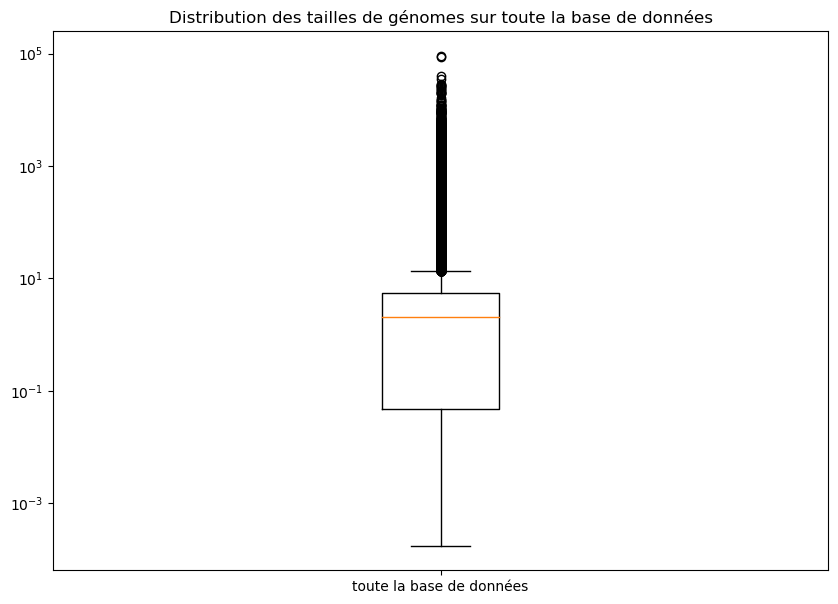

In [5]:

import matplotlib.pyplot as plt

table = open("overview.txt", "r")

data = []

for line in table:  
  line = line.strip().lower().split("\t")
  if line[1] == "kingdom":
    continue
  
  if line[4] != "-":
    data.append(float(line[4]))

fig = plt.figure(figsize = (10, 7))
plt.boxplot(data, labels=["toute la base de données"])
plt.yscale("log")
plt.title("Distribution des tailles de génomes sur toute la base de données")

plt.show()

Q12. Affichez la distribution par royaume.

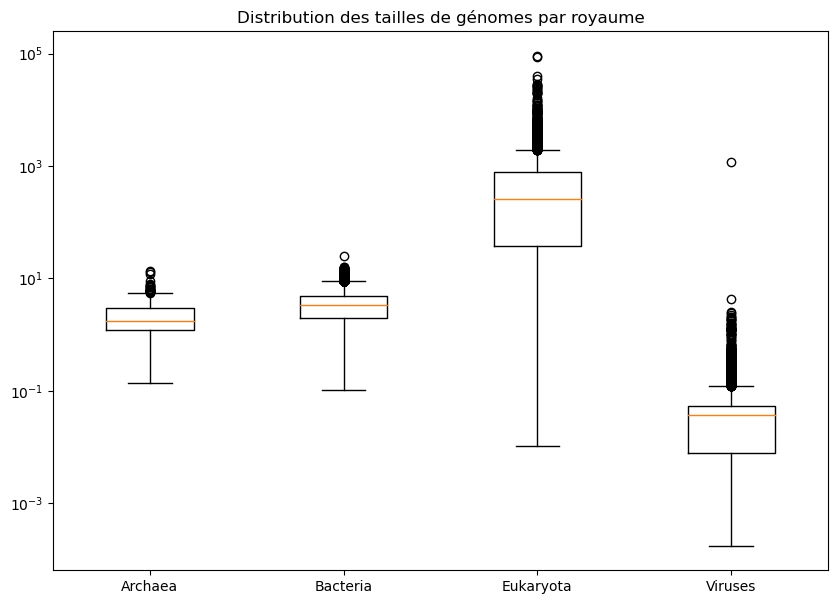

In [6]:
import matplotlib.pyplot as plt

table = open("overview.txt", "r")

data1 = []
data2 = []
data3 = []
data4 = []

for line in table:  
  line = line.strip().lower().split("\t")
  if line[1] == "kingdom":
    continue
  
  if line[4] != "-":
    if line[1] == "archaea":
      data1.append(float(line[4]))
    elif line[1] == "bacteria":
      data2.append(float(line[4]))
    elif line[1] == "eukaryota":
      data3.append(float(line[4]))
    elif line[1] == "viruses":
      data4.append(float(line[4]))

fig = plt.figure(figsize = (10, 7))
plt.boxplot([data1, data2, data3, data4], labels=["Archaea", "Bacteria", "Eukaryota", "Viruses"])
plt.yscale("log")
plt.title("Distribution des tailles de génomes par royaume")

plt.show()

Q13. Affichez la distribution par groupe pour chaque royaume.

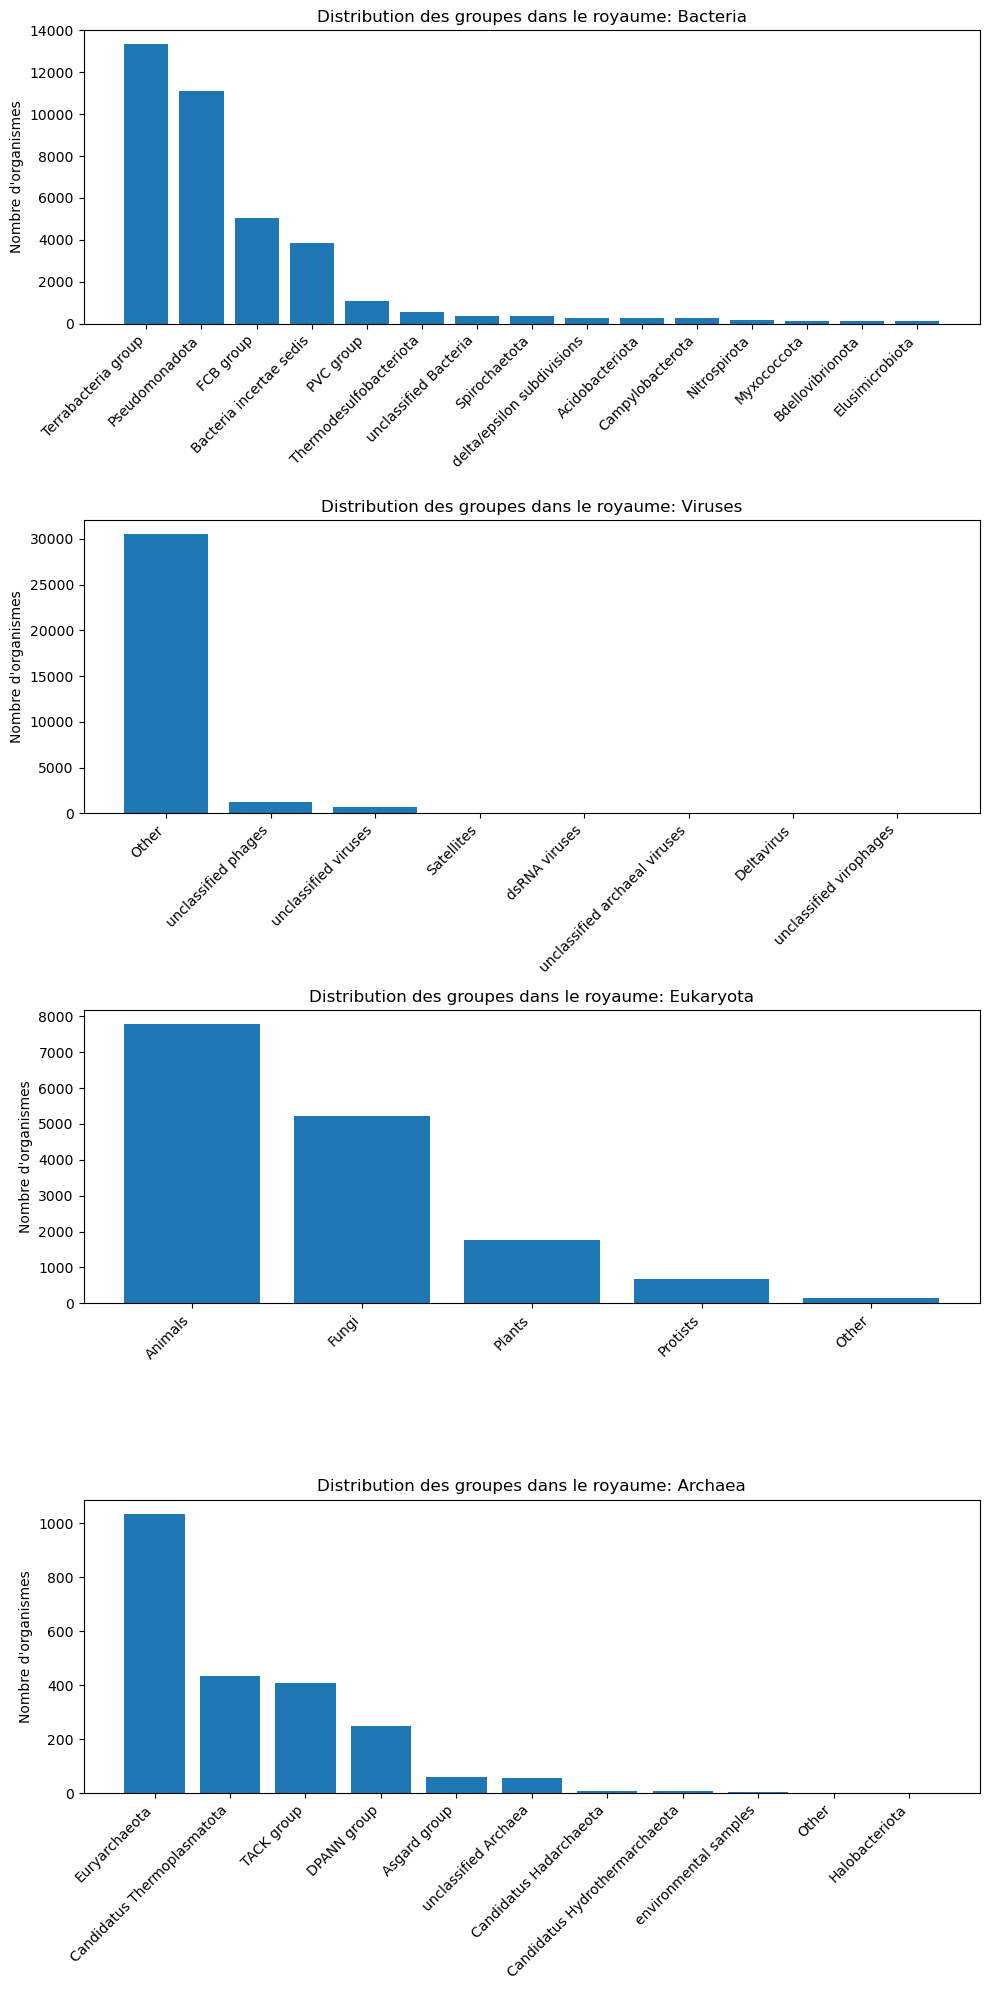

In [7]:
import matplotlib.pyplot as plt

table = open("overview.txt", "r")

kingdoms = {}

for line in table:
    line = line.strip().split("\t")
    if line[1] == "Kingdom":
        continue
    
    kingdom = line[1]
    group = line[2]
    
    if kingdom not in kingdoms:
        kingdoms[kingdom] = {}
        
    if group in kingdoms[kingdom]:
        kingdoms[kingdom][group] += 1
    else:
        kingdoms[kingdom][group] = 1
table.close()

fig, axes = plt.subplots(len(kingdoms), 1, figsize=(10, 5*len(kingdoms)))

if len(kingdoms) == 1:
    axes = [axes]

for i, (kingdom, groups) in enumerate(kingdoms.items()):
    sorted_groups = sorted(groups.items(), key=lambda x: x[1], reverse=True)
    
    if len(sorted_groups) > 15:
        sorted_groups = sorted_groups[:15]
    
    group_names = [g[0] for g in sorted_groups]
    group_counts = [g[1] for g in sorted_groups]
    
    axes[i].bar(range(len(group_names)), group_counts)
    axes[i].set_xticks(range(len(group_names)))
    axes[i].set_xticklabels(group_names, rotation=45, ha='right')
    axes[i].set_title(f"Distribution des groupes dans le royaume: {kingdom}")
    axes[i].set_ylabel("Nombre d'organismes")

plt.tight_layout()
plt.show()

J'ai choisi d'afficher seulement jusqu'à 15 groupes par royaume pour éviter un affichage surchargé. 

Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [8]:
max_data = {}

with open("overview.txt", "r") as file:
    header = file.readline()
    for line in file:
        fields = line.strip().split("\t")
        if fields[4] == "-":
            continue
        try:
            size = float(fields[4])
        except ValueError:
            continue
        
        name = fields[0]
        kingdom = fields[1]
        
        if kingdom not in max_data or size < max_data[kingdom][1]:
            max_data[kingdom] = (name, size)
            
print("Organismes avec le plus petit génome par royaume:")
for kingdom, (name, size) in max_data.items():
    print(f"{kingdom}: {name} avec {size} Mb")

Organismes avec le plus petit génome par royaume:
Bacteria: bacterium AG-323-L21 avec 0.101587 Mb
Viruses: Hippotragine gammaherpesvirus 1 avec 0.000174 Mb
Eukaryota: Fragilariopsis kerguelensis avec 0.010223 Mb
Archaea: candidate division MSBL1 archaeon SCGC-AAA385M02 avec 0.137797 Mb


Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [9]:
max_data = {}

with open("overview.txt", "r") as file:
    header = file.readline()
    for line in file:
        fields = line.strip().split("\t")
        if fields[4] == "-":
            continue
        try:
            size = float(fields[4])
        except ValueError:
            continue
        
        name = fields[0]
        kingdom = fields[1]
        
        if kingdom not in max_data or size > max_data[kingdom][1]:
            max_data[kingdom] = (name, size)
            
print("Organismes avec le plus grand génome par royaume:")
for kingdom, (name, size) in max_data.items():
    print(f"{kingdom}: {name} avec {size} Mb")

Organismes avec le plus grand génome par royaume:
Bacteria: Thiomonas avec 25.1426 Mb
Viruses: uncultured virus avec 1150.68 Mb
Eukaryota: Viscum album avec 91113.7 Mb
Archaea: archaeon avec 13.3999 Mb


## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

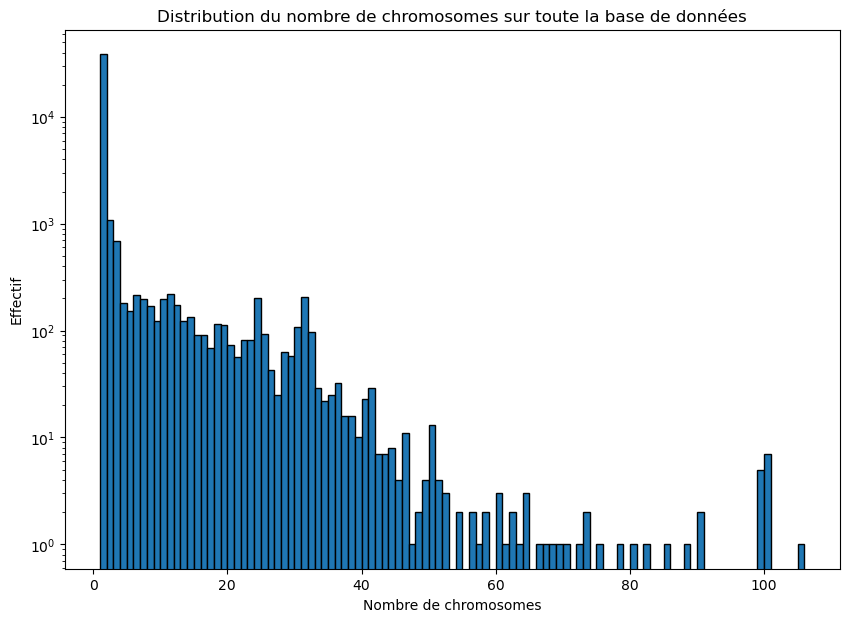

In [10]:
import matplotlib.pyplot as plt

chromosomes = []

with open("overview.txt", "r") as file:
    header = file.readline()
    for line in file:
        fields = line.strip().split("\t")
        if fields[5] != "-" and fields[5] != "":
            try:
                chrs = int(fields[5])
                chromosomes.append(chrs)
            except ValueError:
                continue

plt.figure(figsize=(10, 7))
plt.hist(chromosomes, bins=range(min(chromosomes), max(chromosomes)+2), edgecolor='black')
plt.title("Distribution du nombre de chromosomes sur toute la base de données")
plt.xlabel("Nombre de chromosomes")
plt.ylabel("Effectif")
plt.yscale("log")
plt.show()


Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

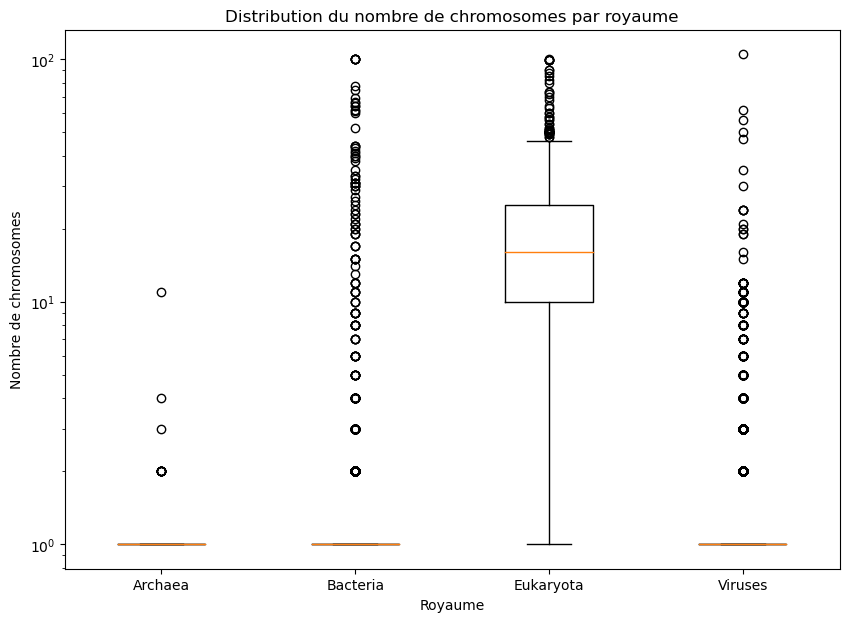

In [11]:
import matplotlib.pyplot as plt

chromosomes_by_kingdom = {}

with open("overview.txt", "r") as file:
    header = file.readline()
    for line in file:
        fields = line.strip().split("\t")
        kingdom = fields[1]
        if fields[5] != "-" and fields[5] != "":
            try:
                chrs = int(fields[5])
                if kingdom not in chromosomes_by_kingdom:
                    chromosomes_by_kingdom[kingdom] = []
                chromosomes_by_kingdom[kingdom].append(chrs)
            except ValueError:
                continue

data_to_plot = [chromosomes_by_kingdom[k] for k in sorted(chromosomes_by_kingdom.keys())]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=sorted(chromosomes_by_kingdom.keys()))
plt.title("Distribution du nombre de chromosomes par royaume")
plt.xlabel("Royaume")
plt.ylabel("Nombre de chromosomes")
plt.yscale("log")
plt.show()


Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

```markdown
Les résultats sont plus facilement exploitables sous la forme d'un boxplot. 
On remarque que les royaumes procaryotes (Bactérie et Archée) présentent une faible variabilité en nombre de chromosomes, souvent 1 (voire sans valeur renseignée). En revanche, les eucaryotes montrent une grande variabilité avec des valeurs pouvant aller de quelques chromosomes à plusieurs dizaines. Cela peut s'expliquer par la complexité structurelle de leur noyau. Les virus souvent représentés par des génomes compacts présentent également de faibles valeurs à l'instar des royaumes procaryotes. 

Cette distribution peut s'expliquer par la complexité de l'organisation cellulaire. Les organismes eucaryotes ont un noyau structuré avec plusieurs mécanismes de régulation alors que les procaryotes ont une oragnisation génomique plus simple. Les virus, dépendent de leurs hôtes pour se développer, cela pourrait expliquer leur génome réduit. 
```

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

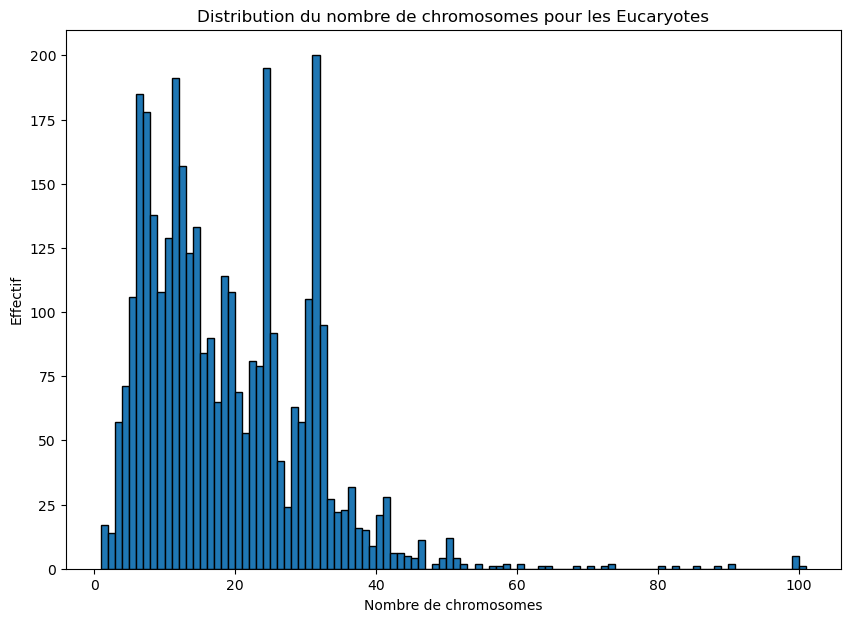

In [12]:
import matplotlib.pyplot as plt

chromosomes = []

with open("overview.txt", "r") as file:
    header = file.readline()
    for line in file:
        fields = line.strip().split("\t")
        kingdom = fields[1]
        if kingdom == "Eukaryota":
            if fields[5] != "-" and fields[5] != "":
                try:
                    chrs = int(fields[5])
                    chromosomes.append(chrs)
                except ValueError:
                    continue

plt.figure(figsize=(10, 7))
plt.hist(chromosomes, bins=range(min(chromosomes), max(chromosomes)+2), edgecolor='black')
plt.title("Distribution du nombre de chromosomes pour les Eucaryotes")
plt.xlabel("Nombre de chromosomes")
plt.ylabel("Effectif")
plt.show()


Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

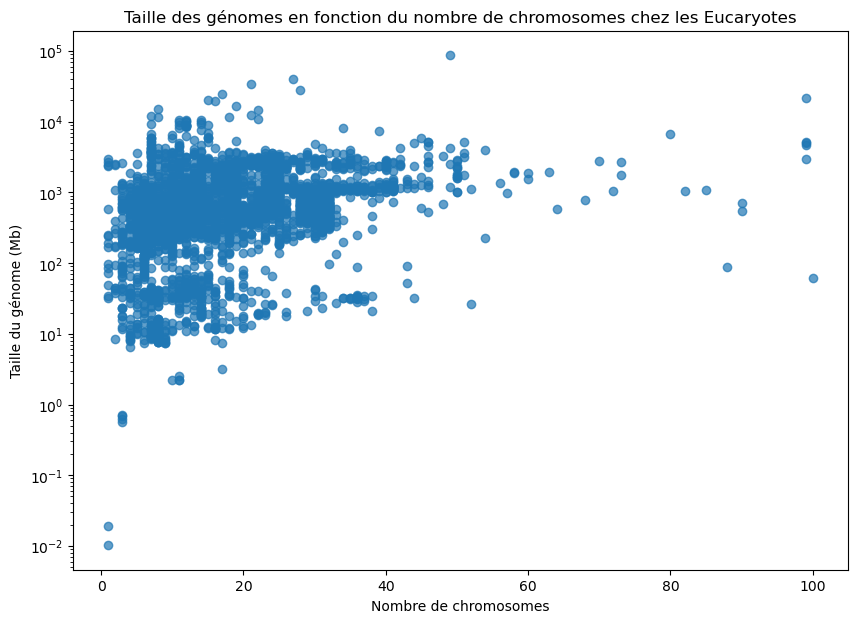

In [13]:
import matplotlib.pyplot as plt

chromosomes = []
sizes = []

with open("overview.txt", "r") as file:
    header = file.readline()
    for line in file:
        fields = line.strip().split("\t")
        kingdom = fields[1]
        if kingdom == "Eukaryota":
            if fields[5] != "-" and fields[4] != "-":
                try:
                    chrs = int(fields[5])
                    size = float(fields[4])
                    chromosomes.append(chrs)
                    sizes.append(size)
                except ValueError:
                    continue

plt.figure(figsize=(10, 7))
plt.scatter(chromosomes, sizes, alpha=0.7)
plt.title("Taille des génomes en fonction du nombre de chromosomes chez les Eucaryotes")
plt.xlabel("Nombre de chromosomes")
plt.ylabel("Taille du génome (Mb)")
plt.yscale("log")
plt.show()

Q21. Qu’observez-vous ?

```markdown
En observant le scatter plot, on remarque qu'il n'existe pas de relation linéaire évidente entre le nombre de chromosomes et la taille du génome chez les eucaryotes. En effet, certains organismes avec un nombre relativement élevé de chromosomes peuvent posséder des génomes relativement petits, tandis que d'autres avec peu de chromosomes peuvent avoir de très grands génomes. On peut en conclure que la taille du génome ne dépend pas simplement du nombre de chromosomes. 
```

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
Un plasmide est une petite molécule d'ADN circulaire, distincte du chromosome principal, que l'on retrouve généralement chez les bactéries. Il peut porter des gènes conférant des avantages sélectifs et peut être transféré d'une cellule à une autre.
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

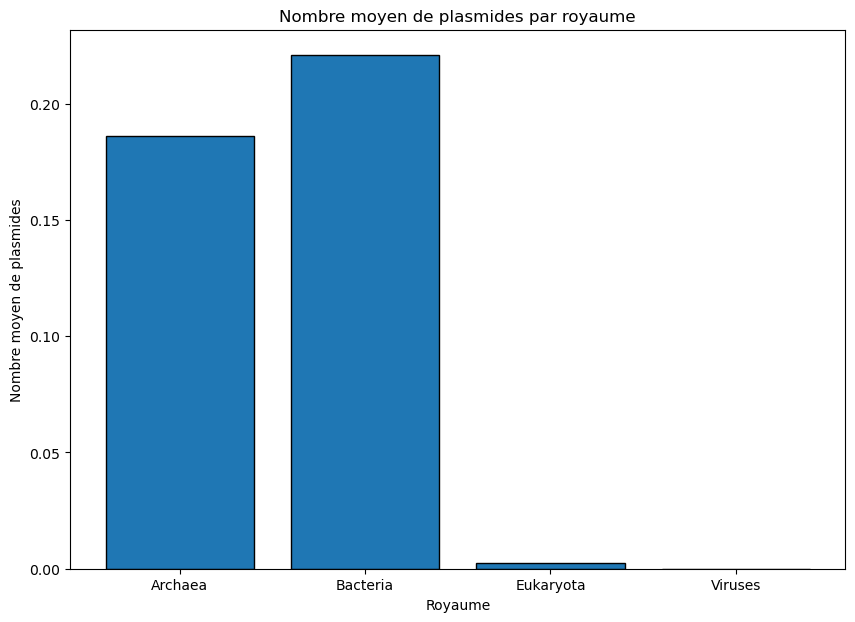

In [14]:
import matplotlib.pyplot as plt

plasmids_by_kingdom = {}

with open("overview.txt", "r") as file:
    header = file.readline().strip().split("\t")
    for line in file:
        fields = line.strip().split("\t")
        kingdom = fields[1]
        if fields[7] != "-" and fields[7] != "":
            try:
                plasmids = int(fields[7])
            except ValueError:
                plasmids = 0
        else:
            plasmids = 0
        
        if kingdom not in plasmids_by_kingdom:
            plasmids_by_kingdom[kingdom] = {"total": 0, "count": 0}
        plasmids_by_kingdom[kingdom]["total"] += plasmids
        plasmids_by_kingdom[kingdom]["count"] += 1

# Moyenne du nombre de plasmides par royaume
kingdoms = sorted(plasmids_by_kingdom.keys())
averages = [plasmids_by_kingdom[k]["total"] / plasmids_by_kingdom[k]["count"] for k in kingdoms]

plt.figure(figsize=(10, 7))
plt.bar(kingdoms, averages, edgecolor='black')
plt.xlabel("Royaume")
plt.ylabel("Nombre moyen de plasmides")
plt.title("Nombre moyen de plasmides par royaume")
plt.show()

Q24. Qu'observez-vous ?

```markdown
Dans ce barplot, on observe que la moyenne de plasmides varie selon les royaumes. Chez les bactéries et les archées, certains organismes possèdent des plasmides alors que d'autres n'en ont pas ce qui donne une moyenne modérée. Cependant, les eucaryotes et les virus, souvent ne possèdent pas de plasmides ce qui affiche une valeur proche de 0. 
```

## Projets

Q25. Qu'est-ce qu'un projet ?

```markdown
Un projet est une initiative de séquençage ou d'assemblage du génome d'un organisme. Il regroupe l'ensemble des travaux, méthodes et ressources associés à la génération et à l'analyse des données génomiques pour cet organisme.
```

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

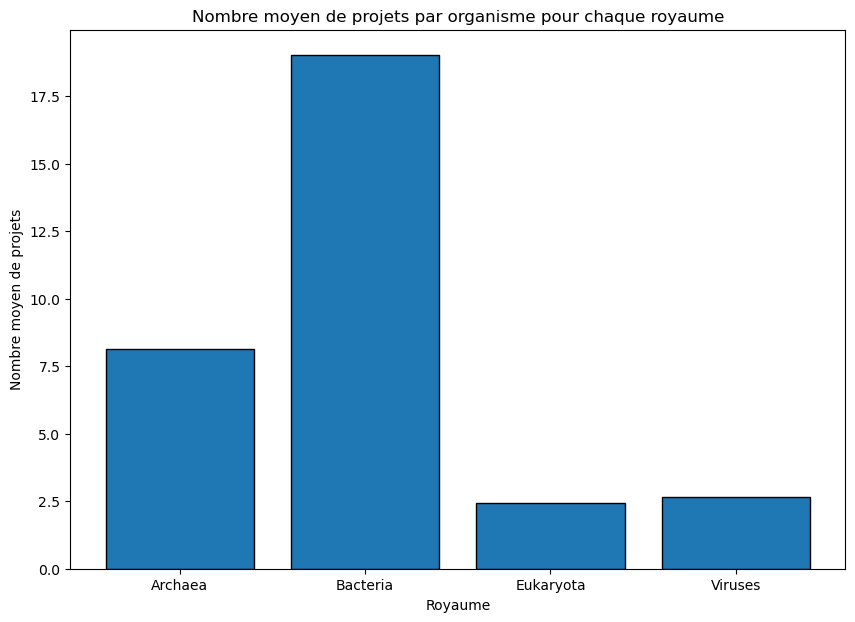

In [15]:
import matplotlib.pyplot as plt

projects_by_kingdom = {}

with open("overview.txt", "r") as file:
    header = file.readline().strip().split("\t")
    for line in file:
        fields = line.strip().split("\t")
        kingdom = fields[1]
        if fields[8] != "-" and fields[8] != "":
            try:
                projects = int(fields[8])
            except ValueError:
                projects = 0
        else:
            projects = 0
        
        if kingdom not in projects_by_kingdom:
            projects_by_kingdom[kingdom] = {"total": 0, "count": 0}
        projects_by_kingdom[kingdom]["total"] += projects
        projects_by_kingdom[kingdom]["count"] += 1

# Moyenne du nombre de projets par organisme pour chaque royaume
kingdoms = sorted(projects_by_kingdom.keys())
averages = [projects_by_kingdom[k]["total"] / projects_by_kingdom[k]["count"] for k in kingdoms]

plt.figure(figsize=(10, 7))
plt.bar(kingdoms, averages, edgecolor='black')
plt.xlabel("Royaume")
plt.ylabel("Nombre moyen de projets")
plt.title("Nombre moyen de projets par organisme pour chaque royaume")
plt.show()


Q27. Combien d'organismes ont 0 projets ?

In [16]:
count_zero = 0

with open("overview.txt", "r") as file:
    header = file.readline()
    for line in file:
        fields = line.strip().split("\t")
        if fields[8] == "-" or fields[8] == "0":
            count_zero += 1

print("Nombre d'organismes avec 0 projet :", count_zero)

Nombre d'organismes avec 0 projet : 2


Q28. Combien d'organismes ont > 1 projets ?

In [17]:
count_more_than_one = 0

with open("overview.txt", "r") as file:
    header = file.readline()
    for line in file:
        fields = line.strip().split("\t")
        try:
            projects = int(fields[8]) if fields[8] != "-" else 0
        except ValueError:
            projects = 0
        if projects > 1:
            count_more_than_one += 1

print("Nombre d'organismes avec plus d'un projet :", count_more_than_one)

Nombre d'organismes avec plus d'un projet : 18947


Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [18]:
organisms_projects = []

with open("overview.txt", "r") as file:
    header = file.readline()
    for line in file:
        fields = line.strip().split("\t")
        name = fields[0]
        try:
            projects = int(fields[8]) if fields[8] != "-" else 0
        except ValueError:
            projects = 0
        organisms_projects.append((name, projects))

# Tri par nombre de projets
organisms_projects.sort(key=lambda x: x[1], reverse=True)
top5 = organisms_projects[:5]

print("Top 5 des organismes avec le plus de projets :")
for name, projects in top5:
    print(f"{name} : {projects} projets")


Top 5 des organismes avec le plus de projets :
Escherichia coli : 39907 projets
Klebsiella pneumoniae : 21229 projets
Staphylococcus aureus : 17228 projets
Salmonella enterica : 16613 projets
uncultured Lachnospiraceae bacterium : 15909 projets


Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

```markdown
Les organismes faisant partie du top 5 ont un intérêt scientifique et médical. Leur étude approfondie permet de mieux comprendre des mécanismes biologiques fondamentaux et de développer de nouvelles biotechnologies par exemple. C'est pour cela que ces organismes font partie du top 5.
```

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
Le GC content est le pourcentage de nucléotides guanine (G) et cytosine (C) présents dans une séquence d'ADN.
Il est mesuré car :
- Il influence la stabilité de l'ADN (les liaisons G-C comportent 3 liaisons hydrogène, donc 1 de plus par rapport aux liaisons A-T)
- Il peut affecter l'expression génique et la structure chromatinienne
- Il fournit des indications sur l'adaptation évolutive et sur l'origine ou la fonction d'un génome
```

Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

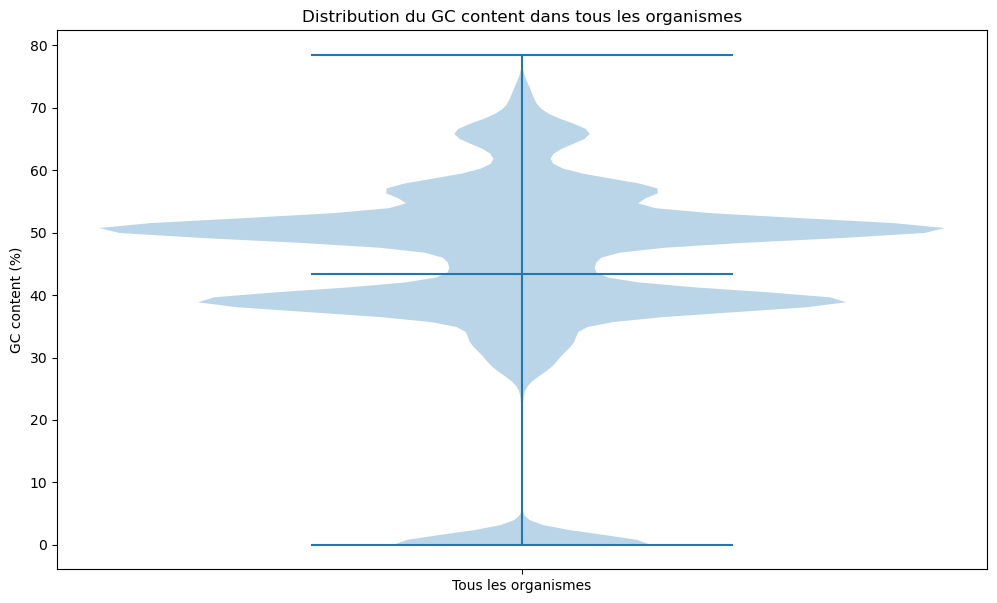

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

csv = pd.read_csv("assembly_summary_genbank_historical.txt", sep="\t", header=0, skiprows=1)
csv.columns = csv.columns.str.strip().str.lstrip('#')

csv['gc_percent'] = pd.to_numeric(csv['gc_percent'])
gc_content = csv['gc_percent'].dropna()

plt.figure(figsize=(12, 7))
plt.violinplot(gc_content, showmeans=True)
plt.title("Distribution du GC content dans tous les organismes")
plt.ylabel("GC content (%)")
plt.xticks([1], ["Tous les organismes"])
plt.show()


Q4. Qu'observez-vous ?

```markdown
La distribution du GC content présente un variabilité avec une majorité d'organismes autour d'une valeur entre 40 et 45%. Cependant, on voit également qu'il y a des valeur très basses et très élevés. Ces valeurs peuvent s'expliquer par des différences taxonomiques.
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

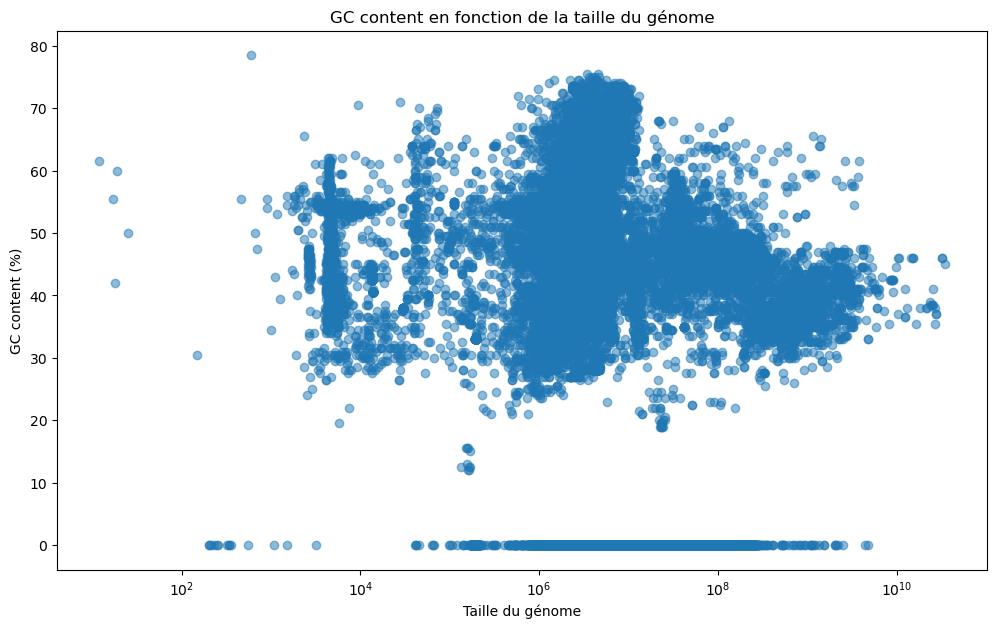

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

csv = pd.read_csv("assembly_summary_genbank_historical.txt", sep="\t", header=0, skiprows=1)
csv.columns = csv.columns.str.strip().str.lstrip('#')

csv['genome_size'] = pd.to_numeric(csv['genome_size'])
csv['gc_percent'] = pd.to_numeric(csv['gc_percent'])

csv_clean = csv.dropna(subset=['genome_size', 'gc_percent'])

plt.figure(figsize=(12, 7))
plt.scatter(csv_clean['genome_size'], csv_clean['gc_percent'], alpha=0.5)
plt.title("GC content en fonction de la taille du génome")
plt.xlabel("Taille du génome")
plt.ylabel("GC content (%)")
plt.xscale("log")
plt.show()


Q6. Qu'observez-vous ?

```markdown
On observe qu'il n'existe pas de relation linéaire entre la taille du génome et le GC content. La plupart des organismes ont un GC content relativement stable qu'importe la taille du génome. 
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

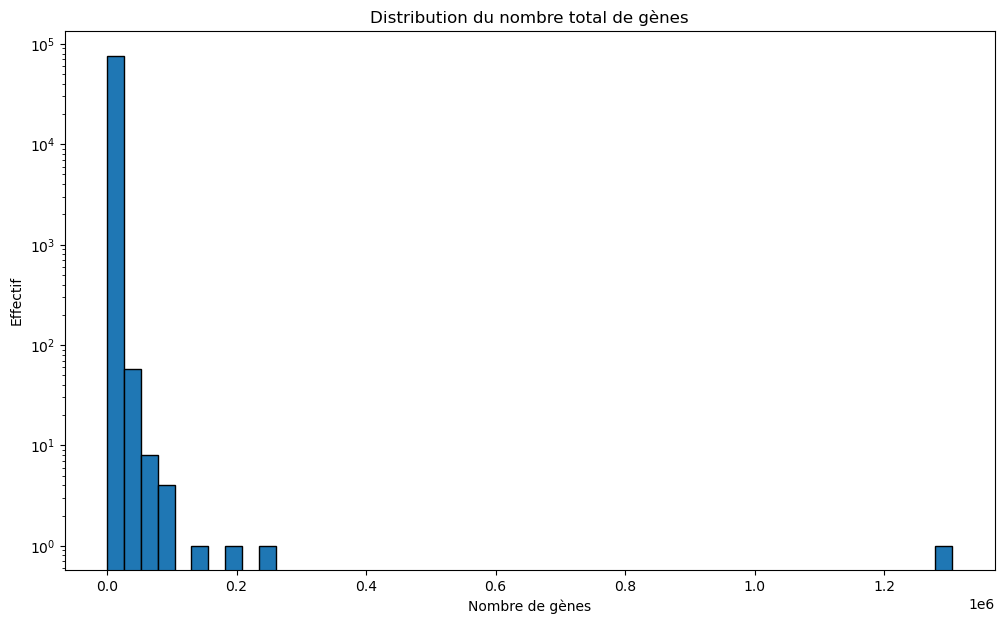

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

csv = pd.read_csv("assembly_summary_genbank_historical.txt", sep="\t", header=0, skiprows=1)
csv.columns = csv.columns.str.strip().str.lstrip('#')

csv['total_gene_count'] = pd.to_numeric(csv['total_gene_count'], errors='coerce')
gene_counts = csv['total_gene_count'].dropna()

plt.figure(figsize=(12, 7))
plt.hist(gene_counts, bins=50, edgecolor='black')
plt.title("Distribution du nombre total de gènes")
plt.xlabel("Nombre de gènes")
plt.ylabel("Effectif")
plt.yscale("log")
plt.show()

Q8. Qu'observez-vous ?

```markdown
L'histogramme montre que la distribution du nombre de gènes se concentre vers la valeur médiane 0. Cependant, on remarque aussi des valeurs aberrantes très élevées qui ne permettent pas de voir correctement la répartition des valeurs centrées autour de 0.
```

Q9. Enlevez les données aberrantes (outliers)

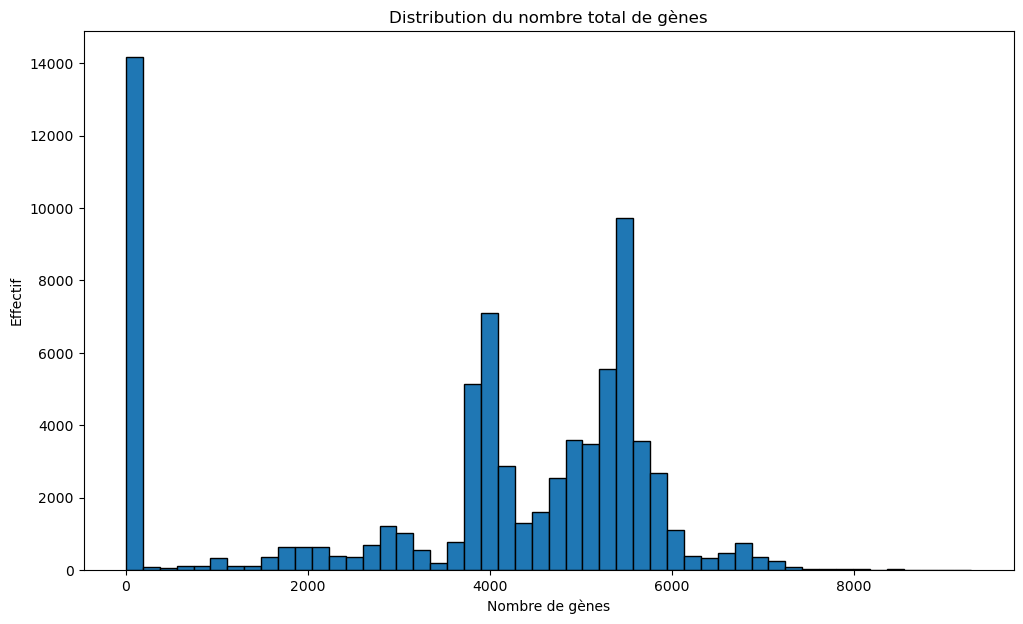

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

csv = pd.read_csv("assembly_summary_genbank_historical.txt", sep="\t", header=0, skiprows=1)
csv.columns = csv.columns.str.strip().str.lstrip('#')

csv['total_gene_count'] = pd.to_numeric(csv['total_gene_count'], errors='coerce')
gene_counts = csv['total_gene_count'].dropna()

Q1 = gene_counts.quantile(0.25)
Q3 = gene_counts.quantile(0.75)

lower_bound = Q1 - 1.5 * (Q3 - Q1)
upper_bound = Q3 + 1.5 * (Q3 - Q1)

filtered_gene_counts = gene_counts[(gene_counts >= lower_bound) & (gene_counts <= upper_bound)]

plt.figure(figsize=(12, 7))
plt.hist(filtered_gene_counts, bins=50, edgecolor='black')
plt.title("Distribution du nombre total de gènes")
plt.xlabel("Nombre de gènes")
plt.ylabel("Effectif")
plt.show()


Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
Pour enlever les valeurs aberrantes, j'ai utilisé la méthode de l'écart interquartile. J'ai d'abord calculé le premier quartile (Q1) et le troisième (Q3) de la distribution du nombre de gènes. J'ai ensuite défini les seuils suivant :
- les valeurs inférieures : Q1 - 1,5 * (Q3 - Q1)
- les valeurs inférieures : Q3 + 1,5 * (Q3 - Q1)
Ces seuils permettent d'enlever les valeurs aberrantes.
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

In [23]:
import pandas as pd
import numpy as np

csv = pd.read_csv("assembly_summary_genbank_historical.txt", sep="\t", header=0, skiprows=1)
csv.columns = csv.columns.str.strip().str.lstrip('#')

csv['total_gene_count'] = pd.to_numeric(csv['total_gene_count'], errors='coerce')
csv['genome_size'] = pd.to_numeric(csv['genome_size'], errors='coerce')

csv_clean = csv.dropna(subset=['total_gene_count', 'genome_size'])

gene_counts = csv_clean['total_gene_count']
Q1_g = gene_counts.quantile(0.25)
Q3_g = gene_counts.quantile(0.75)
IQR_g = Q3_g - Q1_g
lower_bound_g = Q1_g - 1.5 * IQR_g
upper_bound_g = Q3_g + 1.5 * IQR_g

genome_sizes = csv_clean['genome_size']
Q1_s = genome_sizes.quantile(0.25)
Q3_s = genome_sizes.quantile(0.75)
IQR_s = Q3_s - Q1_s
lower_bound_s = Q1_s - 1.5 * IQR_s
upper_bound_s = Q3_s + 1.5 * IQR_s

filtered = csv_clean[(csv_clean['total_gene_count'] >= lower_bound_g) &
                     (csv_clean['total_gene_count'] <= upper_bound_g) &
                     (csv_clean['genome_size'] >= lower_bound_s) &
                     (csv_clean['genome_size'] <= upper_bound_s)]

correlation = filtered['genome_size'].corr(filtered['total_gene_count'])
print(f"Coefficient de corrélation : {correlation:.2f}")


Coefficient de corrélation : 0.65


Le coefficient de corrélation de Pearson indique qu'il existe une corrélation posotive entre la taille du génome et le nombre de gènes.

# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/

(dans latest_assembly_versions/GCA_009729015.1_ASM972901v1, le fichier avec l'extension "fna.gz")


Q2. Affichez le GC content global.

In [24]:
import gzip

with gzip.open("GCA_009729015.1_ASM972901v1_genomic.fna.gz", "rt") as f:
    sequence = "".join([line.strip() for line in f if not line.startswith(">")])

sequence = sequence.upper()

gc_content = (sequence.count("G") + sequence.count("C")) / len(sequence)
print(f"GC content global : {gc_content:.2f}")


GC content global : 0.34


Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

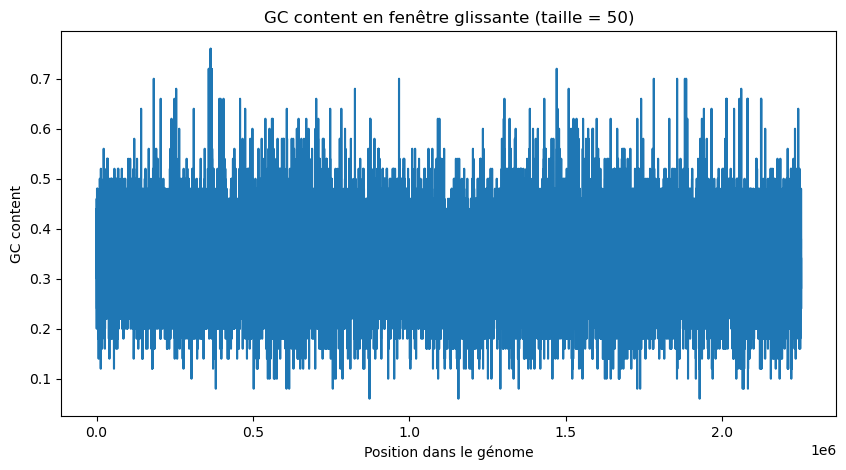

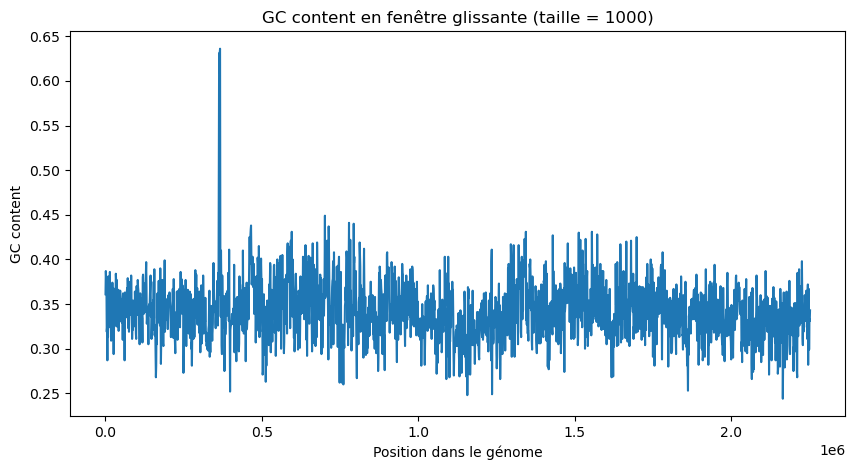

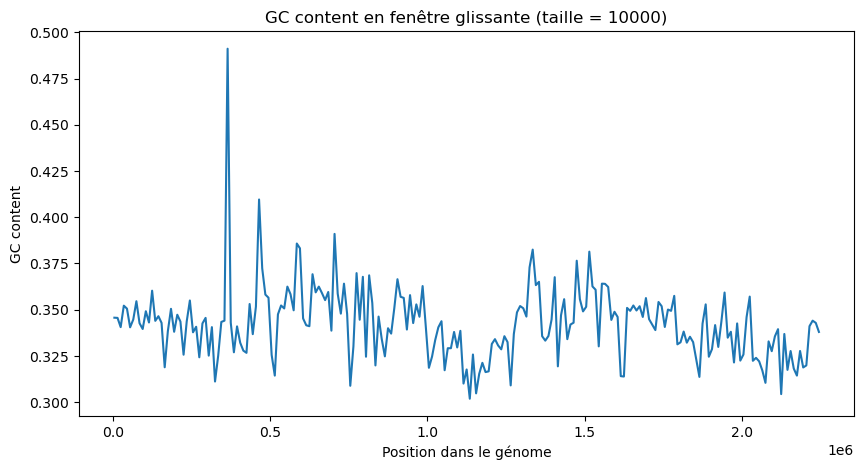

In [25]:
import matplotlib.pyplot as plt

def sliding_window_gc(seq, window_size):
    gc_values = []
    positions = []
    half_window = window_size // 2
    for i in range(half_window, len(seq) - half_window, window_size):
        window = seq[i - half_window:i + half_window]
        gc = (window.count("G") + window.count("C")) / len(window)
        gc_values.append(gc)
        positions.append(i)
    return positions, gc_values

for window_size in [50, 1000, 10000]:
    positions, gc_values = sliding_window_gc(sequence, window_size)
    plt.figure(figsize=(10, 5))
    plt.plot(positions, gc_values)
    plt.title(f"GC content en fenêtre glissante (taille = {window_size})")
    plt.xlabel("Position dans le génome")
    plt.ylabel("GC content")
    plt.show()

Q4. Qu’observez-vous ?

```markdown
Pour une petite fenêtre le graphique est très bruité, reflétant des fluctuations locales importantes dans la composition en GC.
Plus la fenêtre est grande, plus le signal se lisse.
```

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

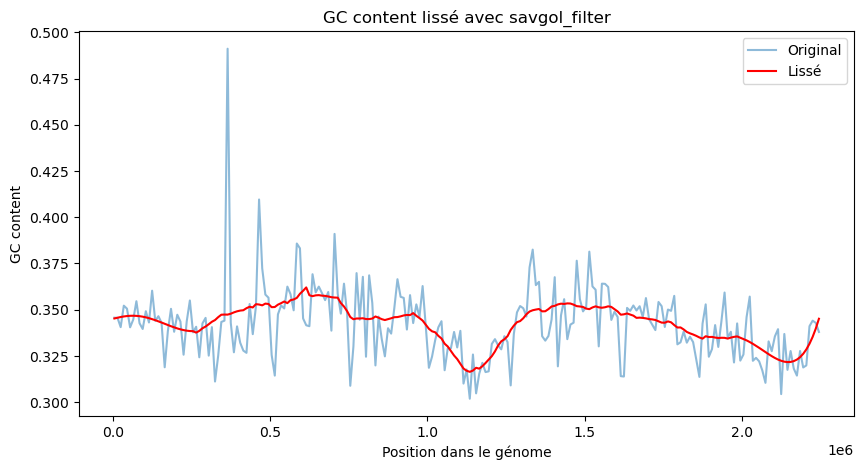

In [26]:
from scipy.signal import savgol_filter

window_size = 10000
positions, gc_values = sliding_window_gc(sequence, window_size)

smoothed_gc = savgol_filter(gc_values, window_length=51, polyorder=5)

plt.figure(figsize=(10, 5))
plt.plot(positions, gc_values, label="Original", alpha=0.5)
plt.plot(positions, smoothed_gc, label="Lissé", color='red')
plt.title("GC content lissé avec savgol_filter")
plt.xlabel("Position dans le génome")
plt.ylabel("GC content")
plt.legend()
plt.show()


Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

GC content global : 0.3423


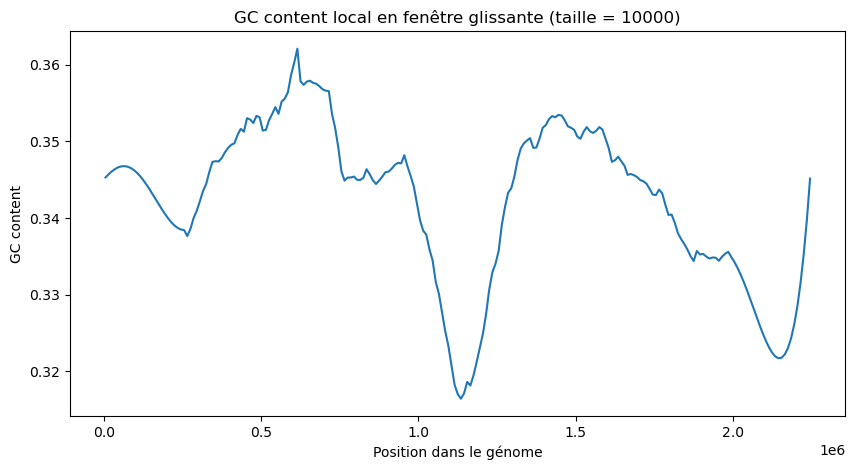

In [27]:
import gzip
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def analyze_gc_content(filename, window_size):
    if filename.endswith(".gz"):
        with gzip.open(filename, "rt") as f:
            lines = f.readlines()
    else:
        with open(filename, "r") as f:
            lines = f.readlines()
    
    sequence = "".join([line.strip() for line in lines if not line.startswith(">")])
    sequence = sequence.upper()
    
    gc_global = (sequence.count("G") + sequence.count("C")) / len(sequence)
    print(f"GC content global : {gc_global:.4f}")
    
    def sliding_window_gc(seq, window_size):
        gc_values = []
        positions = []
        half_window = window_size // 2
        for i in range(half_window, len(seq) - half_window, window_size):
            window = seq[i - half_window:i + half_window]
            gc = (window.count("G") + window.count("C")) / len(window)
            gc_values.append(gc)
            positions.append(i)
        return positions, gc_values
    
    positions, gc_values = sliding_window_gc(sequence, window_size)
    gc_values = savgol_filter(gc_values, window_length=51, polyorder=5)
    
    plt.figure(figsize=(10, 5))
    plt.plot(positions, gc_values)
    plt.title(f"GC content local en fenêtre glissante (taille = {window_size})")
    plt.xlabel("Position dans le génome")
    plt.ylabel("GC content")
    plt.show()

analyze_gc_content("GCA_009729015.1_ASM972901v1_genomic.fna.gz", window_size=10000)
